In [1]:
# For data loading, cleaning, and manipulation (DataFrames)
import pandas as pd 
# For creating plots and visualizing data
import matplotlib.pyplot as plt 
# For advanced, attractive statistical visualizations
import seaborn as sns 
# LabelEncoder: Encode categorical columns into numeric labels
# StandardScaler: Scale numerical features to have zero mean and unit variance
from sklearn.preprocessing import LabelEncoder, StandardScaler
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split 
# Logistic Regression model for binary classification (CTR prediction)
from sklearn.linear_model import LogisticRegression 
# Decision Tree model for classification
from sklearn.tree import DecisionTreeClassifier
# Random Forest (ensemble of decision trees) for better classification accuracy
from sklearn.ensemble import RandomForestClassifier 
# XGBoost, a powerful gradient boosting classifier for high-performance prediction
from xgboost import XGBClassifier 
# Metrics to evaluate model performance:
# accuracy_score: overall correctness
# precision_score: correctness of positive predictions
# recall_score: ability to find all positive samples
# f1_score: harmonic mean of precision and recall
# roc_auc_score: Area Under the ROC Curve (overall model discrimination)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# For saving and loading trained models easily
import joblib 

In [2]:
# Data 
data = pd.read_csv("/kaggle/input/clickthrough-rate-prediction/ad_10000records.csv")
data.head()
# column Analysis
# daily time spent on site:
# - Higher time spent may imply higher interest, increasing CTR likelihood.
# - Low time may indicate less engagement, reducing CTR.
# Age:
# - Different age groups may click on different ad types (e.g., younger users may click on gaming ads more).
# - Useful for targeting and personalization.
# Area Income:
# - Indicates purchasing power of the user.
# - Higher income areas might be more likely to click premium product ads.
# - Helps in audience segmentation for ad targeting.
# Daily Internet Usage:
# - Indicates digital activeness
# - Heavy internet users might be more exposed to and interact with ads, but may also be ad-blind.
# - Helps refine engagement patterns for CTR prediction.
# Ad Topic Line:
# - Different users respond to different ad topics; helps model content preference.
# - Can use encoding (One-Hot/Label Encoding/Embeddings) for training models.
# City:
# - Users in different cities may have different interests and CTR rates.
# Gender:
# - Different gender groups may click on ads at different rates.
# Country:
# Cultural factors and regional interests can affect CTR.
# Timestamp:
# - Can extract day of the week, hour, month to analyze time-based CTR trends.
# - Users may have higher click rates during certain times (e.g., evenings, weekends).
# Clicked on Ad
# Target variable (0 = not clicked, 1 = clicked).

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [3]:
# renaming column names by removing spaces
data = data.rename(columns={"Clicked on Ad": "Clicked_on_Ad"})
data = data.rename(columns={"Daily Time Spent on Site": "DailyTime_Spent_on_Site"})
data = data.rename(columns={"Area Income": "Area_Income"})
data = data.rename(columns={"Daily Internet Usage": "Daily_Internet_Usage"})
data = data.rename(columns={"Ad Topic Line": "Ad_Topic_Line"})

In [4]:
# Data Analysis and preprocessing
data.info()
# there is no null values and data type of timestamp should be changed to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DailyTime_Spent_on_Site  10000 non-null  float64
 1   Age                      10000 non-null  float64
 2   Area_Income              10000 non-null  float64
 3   Daily_Internet_Usage     10000 non-null  float64
 4   Ad_Topic_Line            10000 non-null  object 
 5   City                     10000 non-null  object 
 6   Gender                   10000 non-null  object 
 7   Country                  10000 non-null  object 
 8   Timestamp                10000 non-null  object 
 9   Clicked_on_Ad            10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [5]:
data.Timestamp=pd.to_datetime(data.Timestamp)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DailyTime_Spent_on_Site  10000 non-null  float64       
 1   Age                      10000 non-null  float64       
 2   Area_Income              10000 non-null  float64       
 3   Daily_Internet_Usage     10000 non-null  float64       
 4   Ad_Topic_Line            10000 non-null  object        
 5   City                     10000 non-null  object        
 6   Gender                   10000 non-null  object        
 7   Country                  10000 non-null  object        
 8   Timestamp                10000 non-null  datetime64[ns]
 9   Clicked_on_Ad            10000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 781.4+ KB


In [6]:
# overall click through rate
data['Clicked_on_Ad'].value_counts()

Clicked_on_Ad
0    5083
1    4917
Name: count, dtype: int64

In [7]:
(data['Clicked_on_Ad'].value_counts()/len(data))*100
# The overall click through rate is approx. 49%, and approx. 51% is not clicked.

Clicked_on_Ad
0    50.83
1    49.17
Name: count, dtype: float64

In [8]:
data.nunique()

DailyTime_Spent_on_Site    460
Age                         39
Area_Income                524
Daily_Internet_Usage       505
Ad_Topic_Line              559
City                       521
Gender                       2
Country                    207
Timestamp                  567
Clicked_on_Ad                2
dtype: int64

In [9]:
# EDA of the numeric features
df_num = data.select_dtypes(include = ['float64', 'int64']) # Selecting only numeric columns (float and int)
df_num.head()

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad
0,62.26,32.0,69481.85,172.83,0
1,41.73,31.0,61840.26,207.17,0
2,44.40,30.0,57877.15,172.83,0
3,59.88,28.0,56180.93,207.17,0
4,49.21,30.0,54324.73,201.58,1


In [10]:
df_num.describe() # Displaying basic statistics of numeric features

# The output typically shows:
# count - Number of non-null entries for each numeric feature (checks missing values).
# mean - The average value of the feature (center tendency).
# std - Standard deviation, tells how much the values vary from the mean (spread).
# min - The smallest value in that column. Helps you see what is the lowest a user can have (like lowest age, lowest time spent).
# 25% - If you line up all values from smallest to largest, 25% of the data will be below this number. Example: If 25% = 30 for age, then 25% of users are aged 30 or younger.
# 50% (also called median). The middle value when all values are sorted. 50% of the data is below this number, 50% is above.
# 75% - 75% of the data is below this value, 25% is above.
# max - The largest value in that column. Helps you see what is the highest a user can have (like highest age, highest time spent).

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


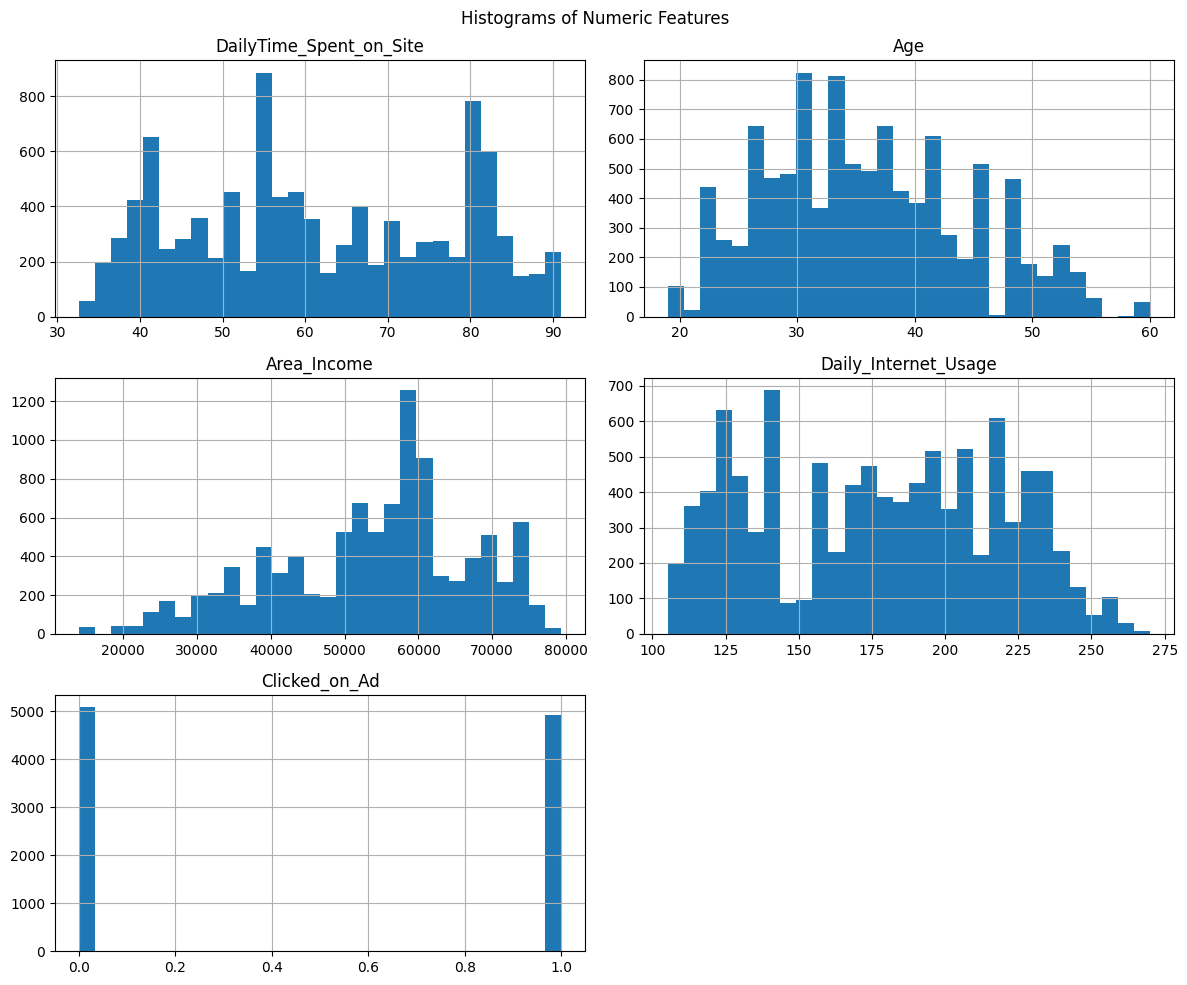

In [11]:
# Plotting histograms to visualize distributions
df_num.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

# Analysis
# Daily Time Spent on Site
# - The distribution is multi-peaked with spikes around 55 and 80 minutes.
# - Users mostly spend 55-60 minutes or 75–85 minutes daily on site.
# - Higher engagement groups may have a higher chance of clicking ads.
# Age
# - Most users are between 25–45 years old.
# - Your audience is primarily young to middle-aged adults.
# Area Income
# - Right-skewed distribution with a peak around 60,000.
# Daily Internet Usage
# - Multi-peaked distribution with spikes around 125,145,160,190, 220 minutes.
# - Heavy internet users may: Click more due to frequent browsing.Ignore ads due to ad fatigue.

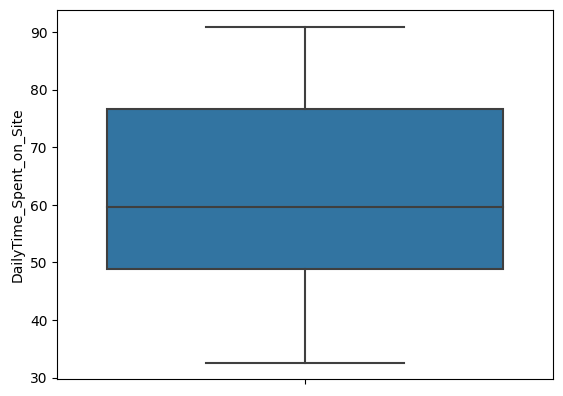

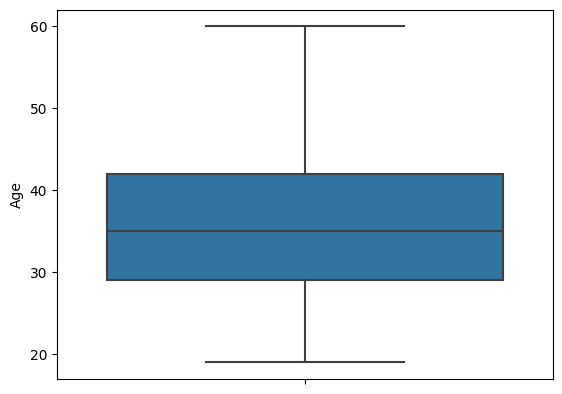

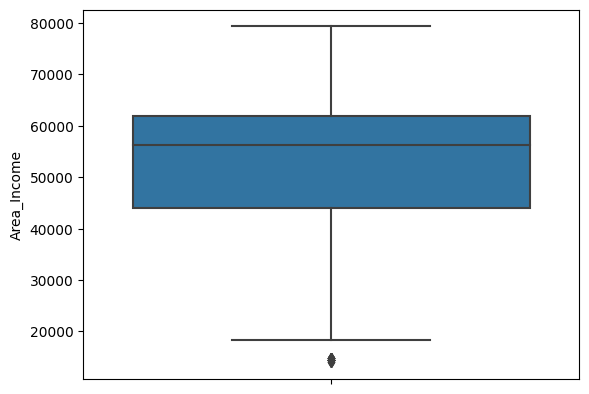

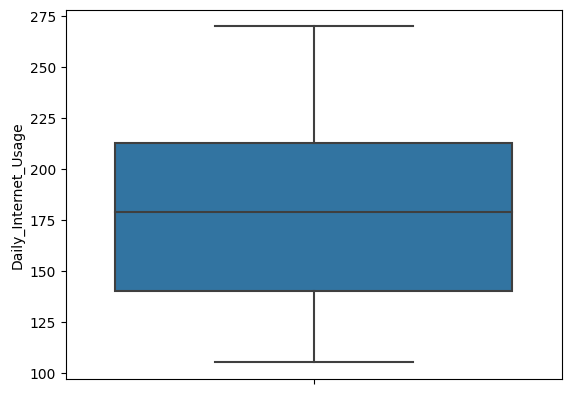

In [12]:
# Plotting boxplots to check for outliers
for i in df_num:
  plt.figsize=(10,5)
  if(i=="Clicked_on_Ad"): break;
  sns.boxplot(y=data[i])
  plt.show()

# Analysis
# Daily Time Spent on Site - No clear outliers (no dots outside whiskers). No outliers to remove.
# Age - No outliers. Age feature is clean, no outlier treatment needed.
# Area Income - Few outliers (dots below) indicate users from very low-income areas.
# Daily Internet Usage - No outliers. Feature is clean, no removal needed.

In [13]:
# Calculate Q1 and Q3 for Area Income
Q1 = data['Area_Income'].quantile(0.25)
Q3 = data['Area_Income'].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

print("Original shape:", data.shape)

# Filter out outliers
data = data[(data['Area_Income'] >= lower_bound) & (data['Area_Income'] <= upper_bound)]

print("New shape after outlier removal:", data.shape)


Q1: 44052.3025
Q3: 61840.26
IQR: 17787.957500000004
Lower Bound: 17370.366249999992
Upper Bound: 88522.19625000001
Original shape: (10000, 10)
New shape after outlier removal: (9966, 10)


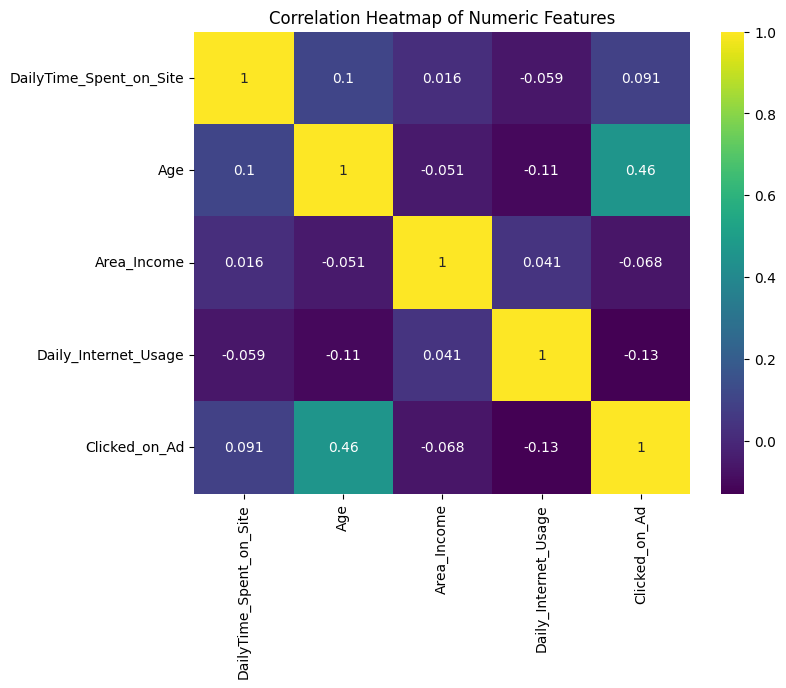

In [14]:
# Correlation heatmap to see relationships between numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# What this heatmap shows:
# Each number is a correlation coefficient (ranging -1 to +1) between two features.
# +1 = perfect positive correlation (as one increases, the other increases).
# -1 = perfect negative correlation (as one increases, the other decreases).
# 0 = no correlation.

# Analysis
# All correlations between input features are low (max 0.1, -0.11), indicating no multicollinearity.

# Age and Clicked_on_Ad (0.46) - Moderate positive correlation
# DailyTime_Spent_on_Site and Clicked_on_Ad (0.091) - Very weak positive correlation. users spending more time on site may click more ads, but not strongly.
# Daily_Internet_Usage and Clicked_on_Ad (-0.13) - Weak negative correlation. 
# Area_Income and Clicked_on_Ad (-0.068) -  Very weak negative correlation.


Ad_Topic_Line: 558 unique values
City: 521 unique values
Gender: 2 unique values
Country: 206 unique values
Gender
Female    5355
Male      4611
Name: count, dtype: int64


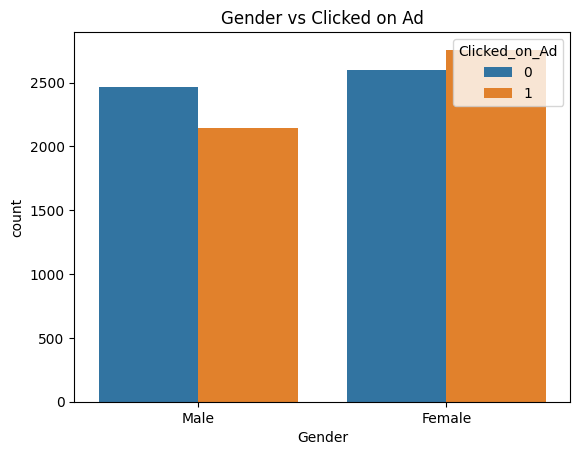

Country
Australia         388
Czech Republic    329
Turkey            312
Qatar             223
Hong Kong         221
Bangladesh        190
Burundi           176
Algeria           174
Vanuatu           162
Bolivia           162
Name: count, dtype: int64


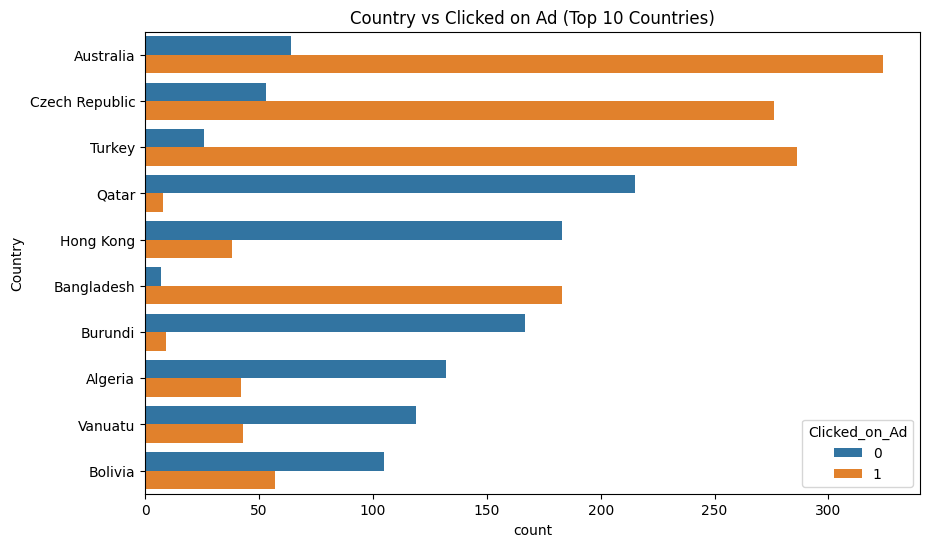

Ad_Topic_Line
Cloned explicit middleware                344
Streamlined homogeneous analyzer          212
Business-focused transitional solution    207
Sharable reciprocal project               187
Intuitive exuding service-desk            173
Name: count, dtype: int64
City
Hubbardmouth       334
West Brandonton    275
Lisafort           261
Wintersfort        230
Stewartbury        207
Name: count, dtype: int64


In [15]:
# EDA of the categorical features
categorical_cols = ['Ad_Topic_Line', 'City', 'Gender', 'Country']

for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

# Value counts for low-cardinality categorical feature
print(data['Gender'].value_counts())

# Gender vs Clicked on Ad
sns.countplot(x='Gender', hue='Clicked_on_Ad', data=data)
plt.title('Gender vs Clicked on Ad')
plt.show()

# Top 10 most frequent Countries
top_countries = data['Country'].value_counts().head(10)
print(top_countries)

# Country vs Clicked on Ad for top 10 countries
top_countries_list = top_countries.index.tolist()
df_top_countries = data[data['Country'].isin(top_countries_list)]
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', hue='Clicked_on_Ad', data=df_top_countries, order=top_countries_list)
plt.title('Country vs Clicked on Ad (Top 10 Countries)')
plt.show()

# High-cardinality columns
# Display top 5 for understanding
print(data['Ad_Topic_Line'].value_counts().head())
print(data['City'].value_counts().head())


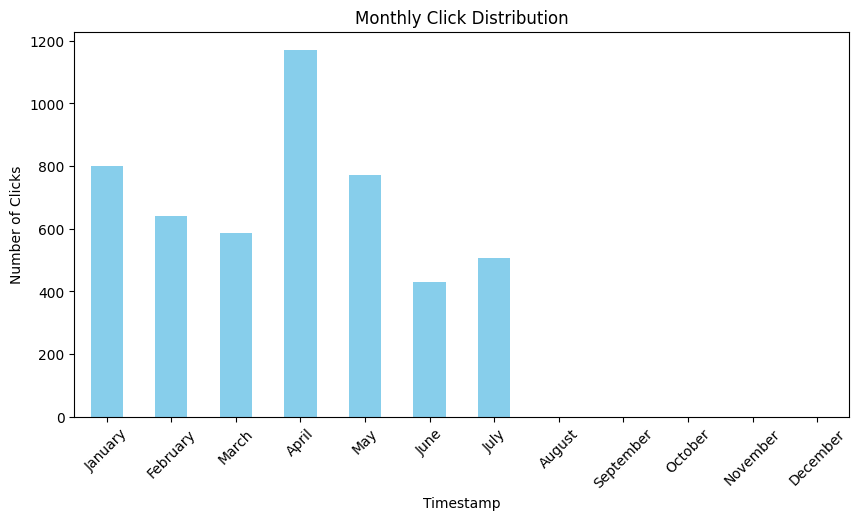

In [16]:
month_series = data['Timestamp'].dt.month_name()

# Group and sum clicks by month
monthly_clicks = data.groupby(month_series)['Clicked_on_Ad'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot
monthly_clicks.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.ylabel('Number of Clicks')
plt.title('Monthly Click Distribution')
plt.xticks(rotation=45)
plt.show()

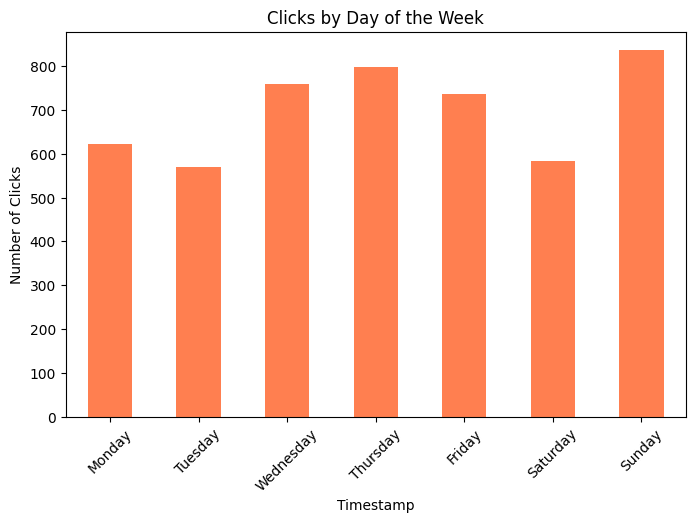

In [17]:
dow_series = data['Timestamp'].dt.day_name()

# Group and sum clicks by day of week
dow_clicks = data.groupby(dow_series)['Clicked_on_Ad'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
dow_clicks.plot(kind='bar', figsize=(8, 5), color='coral')
plt.ylabel('Number of Clicks')
plt.title('Clicks by Day of the Week')
plt.xticks(rotation=45)
plt.show()

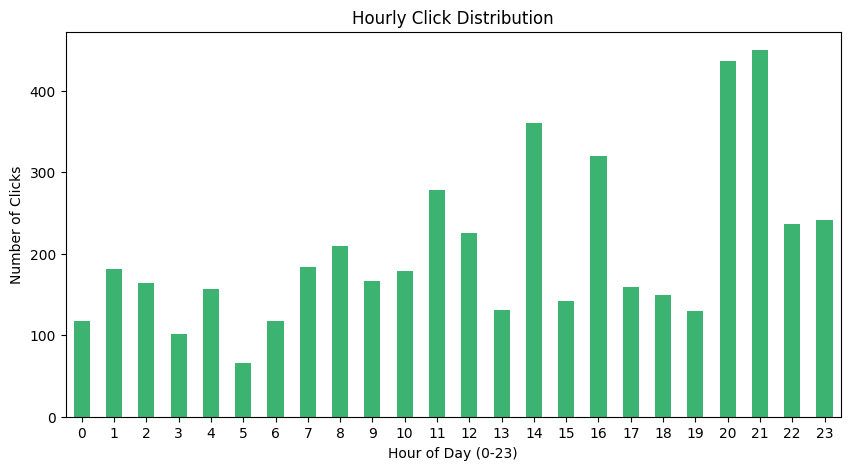

In [18]:
hour_series = data['Timestamp'].dt.hour

# Group and sum clicks by hour
hourly_clicks = data.groupby(hour_series)['Clicked_on_Ad'].sum()

# Plot
hourly_clicks.plot(kind='bar', figsize=(10, 5), color='mediumseagreen')
plt.ylabel('Number of Clicks')
plt.title('Hourly Click Distribution')
plt.xlabel('Hour of Day (0-23)')
plt.xticks(rotation=0)
plt.show()

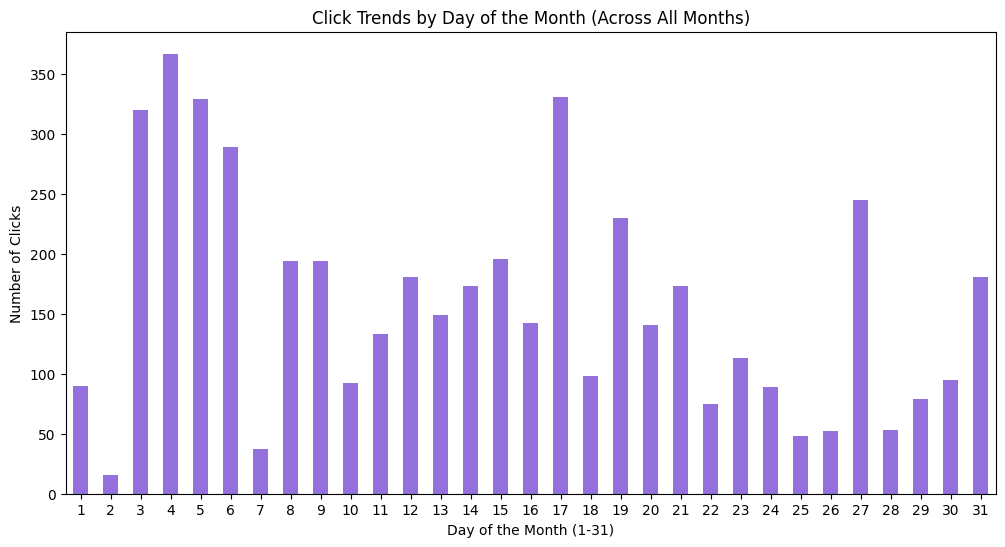

In [19]:
# Create a temporary Series of day of month
day_of_month_series = data['Timestamp'].dt.day

# Group by day of month and sum clicks
day_clicks = data.groupby(day_of_month_series)['Clicked_on_Ad'].sum()

# Plot
plt.figure(figsize=(12, 6))
day_clicks.plot(kind='bar', color='mediumpurple')
plt.title('Click Trends by Day of the Month (Across All Months)')
plt.xlabel('Day of the Month (1-31)')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=0)
plt.show()

In [20]:
# Feature Engineering
# Encoding Categorical Data
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Gender'].head()
# fit_transform is a combined method in scikit-learn that:

# fit(): Learns the required parameters from the data
# (e.g., for LabelEncoder, learns unique categories and assigns them integer labels).

# transform(): Applies the learned parameters to convert the data.
# (e.g., replaces each category with its assigned integer label).

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

In [21]:
# It has extremely high cardinality. Encoding adds complexity and dimensionality without guaranteed performance improvement.
# data.drop('Ad_Topic_Line', axis=1, inplace=True)
# data.head()
# It has high cardinality. Encoding adds complexity and dimensionality without guaranteed performance improvement.
# data.drop('City', axis=1, inplace=True)
# data.head()
# Medium cardinality
# Group Top N countries, others as "Other", then Label Encode or One-Hot Encode.
# Keep top 10 countries, group the rest as 'Other'
# top_countries = data['Country'].value_counts().nlargest(10)
# top_countries # returns index(country),values(count)
# top_countries = top_countries.index

# data['Country'] = data['Country'].apply(lambda x: x if x in top_countries else 'Other')
# print(data['Country'].head(10))

# # Label Encoding for simplicity
# data['Country'] = LabelEncoder().fit_transform(data['Country'])
# print(data['Country'].head(10))


# Label encoding for high-cardinality categorical variables

# Counts how many times each city appears in your dataset. Converts it to a dictionary and
# For each row:
# If City = 'New York' → replaces with 120

city_freq = data['City'].value_counts().to_dict()
data['City_frequency'] = data['City'].map(city_freq)
le_city = LabelEncoder()
data['City_encoded'] = le_city.fit_transform(data['City'])

country_freq = data['Country'].value_counts().to_dict()
data['Country_frequency'] = data['Country'].map(country_freq)
le_country = LabelEncoder()
data['Country_encoded'] = le_country.fit_transform(data['Country'])

le_ad_topic = LabelEncoder()
data['Ad_Topic_encoded'] = le_ad_topic.fit_transform(data['Ad_Topic_Line'])

data.drop('Ad_Topic_Line', axis=1, inplace=True)

data.drop('City', axis=1, inplace=True)

data.drop('Country', axis=1, inplace=True)
data.head()

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Gender,Timestamp,Clicked_on_Ad,City_frequency,City_encoded,Country_frequency,Country_encoded,Ad_Topic_encoded
0,62.26,32.0,69481.85,172.83,1,2016-06-09 21:43:05,0,261,234,6,173,96
1,41.73,31.0,61840.26,207.17,1,2016-01-16 17:56:05,0,109,460,130,165,301
2,44.40,30.0,57877.15,172.83,0,2016-06-29 10:50:45,0,205,379,9,71,484
3,59.88,28.0,56180.93,207.17,0,2016-06-21 14:32:32,0,110,269,39,204,24
4,49.21,30.0,54324.73,201.58,0,2016-07-21 10:54:35,1,16,495,223,148,484


In [22]:
data['day_of_month'] = data['Timestamp'].dt.day
data['hour_of_day'] = data['Timestamp'].dt.hour
data['day_of_week'] = data['Timestamp'].dt.dayofweek
data['month'] = data['Timestamp'].dt.month
data.drop('Timestamp', axis=1, inplace=True)
data.head()

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Gender,Clicked_on_Ad,City_frequency,City_encoded,Country_frequency,Country_encoded,Ad_Topic_encoded,day_of_month,hour_of_day,day_of_week,month
0,62.26,32.0,69481.85,172.83,1,0,261,234,6,173,96,9,21,3,6
1,41.73,31.0,61840.26,207.17,1,0,109,460,130,165,301,16,17,5,1
2,44.40,30.0,57877.15,172.83,0,0,205,379,9,71,484,29,10,2,6
3,59.88,28.0,56180.93,207.17,0,0,110,269,39,204,24,21,14,1,6
4,49.21,30.0,54324.73,201.58,0,1,16,495,223,148,484,21,10,3,7


In [23]:
# Model building
X = data.drop(['Clicked_on_Ad'], axis=1)
y = data['Clicked_on_Ad']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# stratify=y -  Ensures that the proportion of classes in your target y is preserved in both train and test sets.
# Without stratify, your train-test split may randomly get:
# Train: 90% 0, 10% 1
# Test: 70% 0, 30% 1

# With stratify=y, you get:
# Train: 80% 0, 20% 1
# Test: 80% 0, 20% 1


# random_state=42 - Controls the randomness of splitting your data.
# Why 42?
# Douglas Adams’ “The Hitchhiker’s Guide to the Galaxy” humorously states:
# “The answer to the ultimate question of life, the universe, and everything is 42.”
# Because of this, many programmers use 42 as a “fun default seed.”

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# max_iter=1000 means? 
# - The model tries to find the best weights (coefficients) for each feature so it can correctly predict clicks vs. no-clicks.
# - To find these weights, it uses a method that adjusts the weights step-by-step repeatedly.
# - Each adjustment is called an iteration.

In [29]:
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, max_depth=10)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [31]:
def evaluate_model(name, y_true, y_pred):
    print(f"🔹 {name} Performance")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

# Evaluate all models:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

🔹 Logistic Regression Performance
Accuracy: 0.728184553660983
Precision: 0.7436182019977803
Recall: 0.6829765545361876
F1 Score: 0.7120085015940489
🔹 Decision Tree Performance
Accuracy: 0.7988966900702106
Precision: 0.8243847874720358
Recall: 0.7512742099898063
F1 Score: 0.7861333333333332
🔹 Random Forest Performance
Accuracy: 0.8385155466399198
Precision: 0.8577633007600435
Recall: 0.8053007135575942
F1 Score: 0.8307045215562566
🔹 XGBoost Performance
Accuracy: 0.8776328986960883
Precision: 0.8883034773445733
Recall: 0.8593272171253823
F1 Score: 0.8735751295336788


In [34]:
# Dictionary to store models and predictions
model_predictions = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

models = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, y_pred in model_predictions.items():
    models.append(model_name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

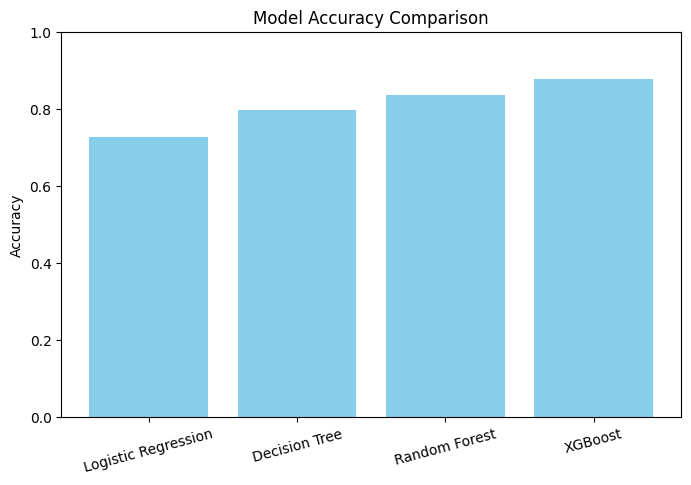

In [35]:
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

In [36]:
feature_columns = [col for col in data.columns if col != 'Clicked_on_Ad']
feature_columns

['DailyTime_Spent_on_Site',
 'Age',
 'Area_Income',
 'Daily_Internet_Usage',
 'Gender',
 'City_frequency',
 'City_encoded',
 'Country_frequency',
 'Country_encoded',
 'Ad_Topic_encoded',
 'day_of_month',
 'hour_of_day',
 'day_of_week',
 'month']

In [37]:
# Feature importance for XGBoost
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

# Save the best model (XGBoost) and preprocessing components
model_artifacts = {
    'model': xgb,
    'scaler': scaler,
    'label_encoders': {
        'city': le_city,
        'country': le_country,
        'ad_topic': le_ad_topic
    },
    'frequency_maps': {
        'city': city_freq,
        'country': country_freq
    },
    'feature_columns': feature_columns,
    'feature_importance': feature_importance
}

In [38]:
# Save model artifacts
joblib.dump(model_artifacts, "ctr_model_complete.pkl")
print("\nModel and preprocessing components saved as 'ctr_model_complete.pkl'")


Model and preprocessing components saved as 'ctr_model_complete.pkl'
